In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_holdings = pd.read_csv("../data/etf_holdings_clean.csv")
df_holdings

,Date,Account,Underlying,MaturityDate,StrikePrice,Type,Price,Shares,MarketValue,Weightings,SharesOutstanding
0,2024-07-12,APRT,SPY,2025-03-31,3.87,C,553.2247,2129.00,1.177815e+08,100.65%,3175000
1,2024-07-12,APRT,SPY,2025-03-31,617.33,C,8.6830,-2129.00,-1.848611e+06,-1.58%,3175000
2,2024-07-12,APRT,SPY,2025-03-31,470.76,P,5.1659,-2129.00,-1.099820e+06,-0.94%,3175000
3,2024-07-12,APRT,SPY,2025-03-31,523.02,P,10.6462,2129.00,2.266576e+06,1.94%,3175000
4,2024-07-12,APRT,Cash&Other,NaN,NaN,NaN,1.0000,-91551.78,-9.155178e+04,-0.08%,3175000
...,...,...,...,...,...,...,...,...,...,...,...
169,2024-07-12,SIXZ,SPY,2024-10-31,3.71,C,555.1102,150.00,8.326653e+06,105.44%,300000
170,2024-07-12,SIXZ,SPY,2024-10-31,543.69,C,31.0701,-150.00,-4.660515e+05,-5.90%,300000
171,2024-07-12,SIXZ,SPY,2024-10-31,451.78,P,1.0376,-150.00,-1.556400e+04,-0.20%,300000
172,2024-07-12,SIXZ,SPY,2024-10-31,501.93,P,2.6020,150.00,3.903000e+04,0.49%,300000


## Adding `D2X` Column 

In [ ]:
from bizdays import Calendar
cal = Calendar.load("PMC/NYSE")

In [ ]:
def bizdays(row):
    from_date = row["Date"]
    to_date = row["MaturityDate"]
    return cal.bizdays(from_date, to_date)

In [ ]:
df_holdings["D2X"] = df_holdings.apply(bizdays, axis=1)
df_holdings

,Date,Account,Underlying,MaturityDate,StrikePrice,Type,Price,Shares,MarketValue,Weightings,SharesOutstanding,D2X
0,2024-07-12,APRT,SPY,2025-03-31,3.87,C,553.2247,2129.00,1.177815e+08,100.65%,3175000,180.0
1,2024-07-12,APRT,SPY,2025-03-31,617.33,C,8.6830,-2129.00,-1.848611e+06,-1.58%,3175000,180.0
2,2024-07-12,APRT,SPY,2025-03-31,470.76,P,5.1659,-2129.00,-1.099820e+06,-0.94%,3175000,180.0
3,2024-07-12,APRT,SPY,2025-03-31,523.02,P,10.6462,2129.00,2.266576e+06,1.94%,3175000,180.0
4,2024-07-12,APRT,Cash&Other,NaN,NaN,NaN,1.0000,-91551.78,-9.155178e+04,-0.08%,3175000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
169,2024-07-12,SIXZ,SPY,2024-10-31,3.71,C,555.1102,150.00,8.326653e+06,105.44%,300000,78.0
170,2024-07-12,SIXZ,SPY,2024-10-31,543.69,C,31.0701,-150.00,-4.660515e+05,-5.90%,300000,78.0
171,2024-07-12,SIXZ,SPY,2024-10-31,451.78,P,1.0376,-150.00,-1.556400e+04,-0.20%,300000,78.0
172,2024-07-12,SIXZ,SPY,2024-10-31,501.93,P,2.6020,150.00,3.903000e+04,0.49%,300000,78.0


## Adding `UPX` Column

In [ ]:
df_spy = pd.read_csv("../data/spy.csv")
df_spy.dropna(inplace=True)
df_holdings["UPX"] = df_spy.query("date == '7/12/2024'").reset_index()['spy'][0]
df_holdings

,Date,Account,Underlying,MaturityDate,StrikePrice,Type,Price,Shares,MarketValue,Weightings,SharesOutstanding,D2X,UPX
0,2024-07-12,APRT,SPY,2025-03-31,3.87,C,553.2247,2129.00,1.177815e+08,100.65%,3175000,180.0,559.99
1,2024-07-12,APRT,SPY,2025-03-31,617.33,C,8.6830,-2129.00,-1.848611e+06,-1.58%,3175000,180.0,559.99
2,2024-07-12,APRT,SPY,2025-03-31,470.76,P,5.1659,-2129.00,-1.099820e+06,-0.94%,3175000,180.0,559.99
3,2024-07-12,APRT,SPY,2025-03-31,523.02,P,10.6462,2129.00,2.266576e+06,1.94%,3175000,180.0,559.99
4,2024-07-12,APRT,Cash&Other,NaN,NaN,NaN,1.0000,-91551.78,-9.155178e+04,-0.08%,3175000,NaN,559.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2024-07-12,SIXZ,SPY,2024-10-31,3.71,C,555.1102,150.00,8.326653e+06,105.44%,300000,78.0,559.99
170,2024-07-12,SIXZ,SPY,2024-10-31,543.69,C,31.0701,-150.00,-4.660515e+05,-5.90%,300000,78.0,559.99
171,2024-07-12,SIXZ,SPY,2024-10-31,451.78,P,1.0376,-150.00,-1.556400e+04,-0.20%,300000,78.0,559.99
172,2024-07-12,SIXZ,SPY,2024-10-31,501.93,P,2.6020,150.00,3.903000e+04,0.49%,300000,78.0,559.99


## Adding `Moneyness` Column

In [ ]:
df_holdings["Moneyness"] = df_holdings["StrikePrice"] / df_holdings["UPX"]
#df_holdings["Moneyness"] = df_holdings["UPX"] / df_holdings["StrikePrice"]
df_holdings

,Date,Account,Underlying,MaturityDate,StrikePrice,Type,Price,Shares,MarketValue,Weightings,SharesOutstanding,D2X,UPX,Moneyness
0,2024-07-12,APRT,SPY,2025-03-31,3.87,C,553.2247,2129.00,1.177815e+08,100.65%,3175000,180.0,559.99,0.006911
1,2024-07-12,APRT,SPY,2025-03-31,617.33,C,8.6830,-2129.00,-1.848611e+06,-1.58%,3175000,180.0,559.99,1.102395
2,2024-07-12,APRT,SPY,2025-03-31,470.76,P,5.1659,-2129.00,-1.099820e+06,-0.94%,3175000,180.0,559.99,0.840658
3,2024-07-12,APRT,SPY,2025-03-31,523.02,P,10.6462,2129.00,2.266576e+06,1.94%,3175000,180.0,559.99,0.933981
4,2024-07-12,APRT,Cash&Other,NaN,NaN,NaN,1.0000,-91551.78,-9.155178e+04,-0.08%,3175000,NaN,559.99,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2024-07-12,SIXZ,SPY,2024-10-31,3.71,C,555.1102,150.00,8.326653e+06,105.44%,300000,78.0,559.99,0.006625
170,2024-07-12,SIXZ,SPY,2024-10-31,543.69,C,31.0701,-150.00,-4.660515e+05,-5.90%,300000,78.0,559.99,0.970892
171,2024-07-12,SIXZ,SPY,2024-10-31,451.78,P,1.0376,-150.00,-1.556400e+04,-0.20%,300000,78.0,559.99,0.806764
172,2024-07-12,SIXZ,SPY,2024-10-31,501.93,P,2.6020,150.00,3.903000e+04,0.49%,300000,78.0,559.99,0.896320


## Adding `RF` Column

In [ ]:
df_risk_free = pd.read_csv("../data/rates.csv")
df_risk_free.head()

,ObservationDate,CurveTicker,ComponentTicker,TenorString,D2X,Close,TenorEnd
0,7/12/2024,YCSW0042,USSO1Day Curncy,1D,1,5.3294,7/13/2024
1,7/12/2024,YCSW0042,USSO1Z Curncy,1W,5,5.3294,4/11/2024
2,7/12/2024,YCSW0042,USSO2Z Curncy,2W,10,5.3322,4/18/2024
3,7/12/2024,YCSW0042,USSO3Z Curncy,3W,15,5.3320,4/25/2024
4,7/12/2024,YCSW0042,USSOA Curncy,1M,21,5.3329,5/4/2024


In [ ]:
def risk_free(row):
    d2x = row["D2X"]
    return np.interp(d2x, df_risk_free["D2X"], df_risk_free["Close"])

In [ ]:
df_holdings["RF"] = df_holdings.apply(risk_free, axis=1) / 100
df_holdings

,Date,Account,Underlying,MaturityDate,StrikePrice,Type,Price,Shares,MarketValue,Weightings,SharesOutstanding,D2X,UPX,Moneyness,RF
0,2024-07-12,APRT,SPY,2025-03-31,3.87,C,553.2247,2129.00,1.177815e+08,100.65%,3175000,180.0,559.99,0.006911,0.049883
1,2024-07-12,APRT,SPY,2025-03-31,617.33,C,8.6830,-2129.00,-1.848611e+06,-1.58%,3175000,180.0,559.99,1.102395,0.049883
2,2024-07-12,APRT,SPY,2025-03-31,470.76,P,5.1659,-2129.00,-1.099820e+06,-0.94%,3175000,180.0,559.99,0.840658,0.049883
3,2024-07-12,APRT,SPY,2025-03-31,523.02,P,10.6462,2129.00,2.266576e+06,1.94%,3175000,180.0,559.99,0.933981,0.049883
4,2024-07-12,APRT,Cash&Other,NaN,NaN,NaN,1.0000,-91551.78,-9.155178e+04,-0.08%,3175000,NaN,559.99,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2024-07-12,SIXZ,SPY,2024-10-31,3.71,C,555.1102,150.00,8.326653e+06,105.44%,300000,78.0,559.99,0.006625,0.052484
170,2024-07-12,SIXZ,SPY,2024-10-31,543.69,C,31.0701,-150.00,-4.660515e+05,-5.90%,300000,78.0,559.99,0.970892,0.052484
171,2024-07-12,SIXZ,SPY,2024-10-31,451.78,P,1.0376,-150.00,-1.556400e+04,-0.20%,300000,78.0,559.99,0.806764,0.052484
172,2024-07-12,SIXZ,SPY,2024-10-31,501.93,P,2.6020,150.00,3.903000e+04,0.49%,300000,78.0,559.99,0.896320,0.052484


## Adding `DIV` Column

In [ ]:
df_dividend = pd.read_csv("../data/spx_dividend.csv")
#df_dividend['DivCurve'] = df_dividend['DivCurve'][:-2]
df_dividend.head()

,DivExpirationDate,DivCurve
0,15-Jul-24,0.02915
1,16-Jul-24,0.01962
2,17-Jul-24,0.01690
3,18-Jul-24,0.01133
4,19-Jul-24,-0.00320


In [ ]:
#pd.to_datetime(df_dividend["DivExpirationDate"][0])

In [ ]:
df_dividend["Date"] = '2024-07-12'
df_dividend["DivExpirationDate"] = pd.to_datetime(df_dividend["DivExpirationDate"])#, format="%dd-%b-%y", dayfirst=True)
df_dividend["Date"] = pd.to_datetime(df_dividend["Date"])
df_dividend.head()

/tmp/ipykernel_461030/1404774386.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dividend["DivExpirationDate"] = pd.to_datetime(df_dividend["DivExpirationDate"])#, format="%dd-%b-%y", dayfirst=True)


,DivExpirationDate,DivCurve,Date
0,2024-07-15,0.02915,2024-07-12
1,2024-07-16,0.01962,2024-07-12
2,2024-07-17,0.01690,2024-07-12
3,2024-07-18,0.01133,2024-07-12
4,2024-07-19,-0.00320,2024-07-12


In [ ]:
def bizdays(row):
    from_date = row["Date"]
    to_date = row["DivExpirationDate"]
    return cal.bizdays(from_date, to_date)

In [ ]:
df_dividend["D2X"] = df_dividend.apply(bizdays, axis=1)
df_dividend.head()

,DivExpirationDate,DivCurve,Date,D2X
0,2024-07-15,0.02915,2024-07-12,1
1,2024-07-16,0.01962,2024-07-12,2
2,2024-07-17,0.01690,2024-07-12,3
3,2024-07-18,0.01133,2024-07-12,4
4,2024-07-19,-0.00320,2024-07-12,5


In [ ]:
def dividend(row):
    d2x = row["D2X"]
    dividend = np.interp(d2x, df_dividend["D2X"], df_dividend["DivCurve"])
    if dividend < 0:
        dividend = 0
    return dividend

In [ ]:
df_holdings["Div"] = df_holdings.apply(dividend, axis=1)
df_holdings

,Date,Account,Underlying,MaturityDate,StrikePrice,Type,Price,Shares,MarketValue,Weightings,SharesOutstanding,D2X,UPX,Moneyness,RF,Div
0,2024-07-12,APRT,SPY,2025-03-31,3.87,C,553.2247,2129.00,1.177815e+08,100.65%,3175000,180.0,559.99,0.006911,0.049883,0.00596
1,2024-07-12,APRT,SPY,2025-03-31,617.33,C,8.6830,-2129.00,-1.848611e+06,-1.58%,3175000,180.0,559.99,1.102395,0.049883,0.00596
2,2024-07-12,APRT,SPY,2025-03-31,470.76,P,5.1659,-2129.00,-1.099820e+06,-0.94%,3175000,180.0,559.99,0.840658,0.049883,0.00596
3,2024-07-12,APRT,SPY,2025-03-31,523.02,P,10.6462,2129.00,2.266576e+06,1.94%,3175000,180.0,559.99,0.933981,0.049883,0.00596
4,2024-07-12,APRT,Cash&Other,NaN,NaN,NaN,1.0000,-91551.78,-9.155178e+04,-0.08%,3175000,NaN,559.99,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2024-07-12,SIXZ,SPY,2024-10-31,3.71,C,555.1102,150.00,8.326653e+06,105.44%,300000,78.0,559.99,0.006625,0.052484,0.00557
170,2024-07-12,SIXZ,SPY,2024-10-31,543.69,C,31.0701,-150.00,-4.660515e+05,-5.90%,300000,78.0,559.99,0.970892,0.052484,0.00557
171,2024-07-12,SIXZ,SPY,2024-10-31,451.78,P,1.0376,-150.00,-1.556400e+04,-0.20%,300000,78.0,559.99,0.806764,0.052484,0.00557
172,2024-07-12,SIXZ,SPY,2024-10-31,501.93,P,2.6020,150.00,3.903000e+04,0.49%,300000,78.0,559.99,0.896320,0.052484,0.00557


## Adding `IV` Columns

In [ ]:
df_vol_surface = pd.read_csv("../data/spx_implied_volatility.csv")
df_vol_surface

,ObservationDate,ExpirationDate,Tenor,D2X,Strike,Moneyness,BBG
0,7/12/2024,13-Jul-24,1D,1,4489.2,0.800,65.87
1,7/12/2024,13-Jul-24,1D,1,5050.4,0.900,41.86
2,7/12/2024,13-Jul-24,1D,1,5330.9,0.950,24.63
3,7/12/2024,13-Jul-24,1D,1,5471.2,0.975,14.14
4,7/12/2024,13-Jul-24,1D,1,5611.5,1.000,7.08
...,...,...,...,...,...,...,...
103,7/12/2024,11-Jul-29,5Y,1260,5611.5,1.000,19.09
104,7/12/2024,11-Jul-29,5Y,1260,5751.8,1.025,18.77
105,7/12/2024,11-Jul-29,5Y,1260,5892.1,1.050,18.44
106,7/12/2024,11-Jul-29,5Y,1260,6172.7,1.100,17.75


In [ ]:
d2x = df_vol_surface["D2X"].values.reshape(12, 9).T
moneyness = df_vol_surface["Moneyness"].values.reshape(12, 9)

In [ ]:
points = np.array(np.meshgrid(d2x[0], moneyness[0])).T.reshape(-1, 2)
points

array([[1.000e+00, 8.000e-01],
       [1.000e+00, 9.000e-01],
       [1.000e+00, 9.500e-01],
       [1.000e+00, 9.750e-01],
       [1.000e+00, 1.000e+00],
       [1.000e+00, 1.025e+00],
       [1.000e+00, 1.050e+00],
       [1.000e+00, 1.100e+00],
       [1.000e+00, 1.200e+00],
       [5.000e+00, 8.000e-01],
       [5.000e+00, 9.000e-01],
       [5.000e+00, 9.500e-01],
       [5.000e+00, 9.750e-01],
       [5.000e+00, 1.000e+00],
       [5.000e+00, 1.025e+00],
       [5.000e+00, 1.050e+00],
       [5.000e+00, 1.100e+00],
       [5.000e+00, 1.200e+00],
       [2.100e+01, 8.000e-01],
       [2.100e+01, 9.000e-01],
       [2.100e+01, 9.500e-01],
       [2.100e+01, 9.750e-01],
       [2.100e+01, 1.000e+00],
       [2.100e+01, 1.025e+00],
       [2.100e+01, 1.050e+00],
       [2.100e+01, 1.100e+00],
       [2.100e+01, 1.200e+00],
       [4.200e+01, 8.000e-01],
       [4.200e+01, 9.000e-01],
       [4.200e+01, 9.500e-01],
       [4.200e+01, 9.750e-01],
       [4.200e+01, 1.000e+00],
       [

In [ ]:
vols = df_vol_surface["BBG"].values.reshape(12, 9) / 100
values = vols.reshape(108)
values

array([0.6587, 0.4186, 0.2463, 0.1414, 0.0708, 0.0982, 0.1727, 0.2903,
       0.4441, 0.5279, 0.3134, 0.1807, 0.1182, 0.0882, 0.0855, 0.1215,
       0.2101, 0.3415, 0.3407, 0.208 , 0.1464, 0.1219, 0.1034, 0.0955,
       0.095 , 0.1243, 0.2066, 0.2759, 0.184 , 0.1431, 0.1254, 0.1076,
       0.102 , 0.0957, 0.1082, 0.1621, 0.2547, 0.1783, 0.1443, 0.1279,
       0.1137, 0.1039, 0.0992, 0.1001, 0.1386, 0.2336, 0.1808, 0.1571,
       0.1456, 0.135 , 0.1259, 0.1188, 0.1107, 0.113 , 0.2233, 0.183 ,
       0.1638, 0.1545, 0.1456, 0.1376, 0.1306, 0.12  , 0.1105, 0.2197,
       0.185 , 0.1691, 0.1609, 0.1525, 0.1438, 0.1348, 0.125 , 0.1132,
       0.2121, 0.1898, 0.1788, 0.1733, 0.1678, 0.1624, 0.157 , 0.1471,
       0.1317, 0.2099, 0.1912, 0.1819, 0.1772, 0.1725, 0.1678, 0.1632,
       0.1543, 0.1392, 0.2112, 0.196 , 0.1886, 0.1848, 0.181 , 0.1771,
       0.1733, 0.1657, 0.1517, 0.2154, 0.2031, 0.1971, 0.194 , 0.1909,
       0.1877, 0.1844, 0.1775, 0.1642])

In [ ]:
import scipy
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import NearestNDInterpolator
interp = LinearNDInterpolator(points, values, fill_value=0.25)
#interp = NearestNDInterpolator(points, values, np.max(values))
#interp = scipy.interpolate.interp2d(x=points[:,0], y=points[:,1], z=values, bounds_error=False, fill_value=None)

In [ ]:
def vol_surface(row):
    d2x = row["D2X"]
    moneyness = row["Moneyness"]
    return np.round(interp(d2x, moneyness), 4)

In [ ]:
# need to use 2-dimensional interpolation
df_holdings["Volatility"] = df_holdings.apply(vol_surface, axis=1)
df_holdings

,Date,Account,Underlying,MaturityDate,StrikePrice,Type,Price,Shares,MarketValue,Weightings,SharesOutstanding,D2X,UPX,Moneyness,RF,Div,Volatility
0,2024-07-12,APRT,SPY,2025-03-31,3.87,C,553.2247,2129.00,1.177815e+08,100.65%,3175000,180.0,559.99,0.006911,0.049883,0.00596,0.2500
1,2024-07-12,APRT,SPY,2025-03-31,617.33,C,8.6830,-2129.00,-1.848611e+06,-1.58%,3175000,180.0,559.99,1.102395,0.049883,0.00596,0.1184
2,2024-07-12,APRT,SPY,2025-03-31,470.76,P,5.1659,-2129.00,-1.099820e+06,-0.94%,3175000,180.0,559.99,0.840658,0.049883,0.00596,0.2066
3,2024-07-12,APRT,SPY,2025-03-31,523.02,P,10.6462,2129.00,2.266576e+06,1.94%,3175000,180.0,559.99,0.933981,0.049883,0.00596,0.1690
4,2024-07-12,APRT,Cash&Other,NaN,NaN,NaN,1.0000,-91551.78,-9.155178e+04,-0.08%,3175000,NaN,559.99,NaN,NaN,NaN,0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2024-07-12,SIXZ,SPY,2024-10-31,3.71,C,555.1102,150.00,8.326653e+06,105.44%,300000,78.0,559.99,0.006625,0.052484,0.00557,0.2500
170,2024-07-12,SIXZ,SPY,2024-10-31,543.69,C,31.0701,-150.00,-4.660515e+05,-5.90%,300000,78.0,559.99,0.970892,0.052484,0.00557,0.1348
171,2024-07-12,SIXZ,SPY,2024-10-31,451.78,P,1.0376,-150.00,-1.556400e+04,-0.20%,300000,78.0,559.99,0.806764,0.052484,0.00557,0.2461
172,2024-07-12,SIXZ,SPY,2024-10-31,501.93,P,2.6020,150.00,3.903000e+04,0.49%,300000,78.0,559.99,0.896320,0.052484,0.00557,0.1817


## Calculating Prices and Greeks

In [ ]:
from py_vollib.black_scholes_merton import black_scholes_merton
from py_vollib.black_scholes_merton.greeks.analytical import delta
from py_vollib.black_scholes_merton.greeks.analytical import vega

In [ ]:
def bsm_px(row):
    underlying = row["Underlying"]
    if underlying == "Cash&Other":
        return(np.nan)
    
    cp = row["Type"].lower()
    upx = row["UPX"]
    strike = row["StrikePrice"]
    t2x = row["D2X"] / 252
    rf = row["RF"]
    volatility = row["Volatility"]
    q = row["Div"]
    px = black_scholes_merton(cp, upx, strike, t2x, rf, volatility, q)
    px = np.round(px, 4)
    
    return(px)

In [ ]:
df_holdings["MyPrice"] = df_holdings.apply(bsm_px, axis=1)
df_holdings

,Date,Account,Underlying,MaturityDate,StrikePrice,Type,Price,Shares,MarketValue,Weightings,SharesOutstanding,D2X,UPX,Moneyness,RF,Div,Volatility,MyPrice
0,2024-07-12,APRT,SPY,2025-03-31,3.87,C,553.2247,2129.00,1.177815e+08,100.65%,3175000,180.0,559.99,0.006911,0.049883,0.00596,0.2500,553.8766
1,2024-07-12,APRT,SPY,2025-03-31,617.33,C,8.6830,-2129.00,-1.848611e+06,-1.58%,3175000,180.0,559.99,1.102395,0.049883,0.00596,0.1184,8.7971
2,2024-07-12,APRT,SPY,2025-03-31,470.76,P,5.1659,-2129.00,-1.099820e+06,-0.94%,3175000,180.0,559.99,0.840658,0.049883,0.00596,0.2066,5.1887
3,2024-07-12,APRT,SPY,2025-03-31,523.02,P,10.6462,2129.00,2.266576e+06,1.94%,3175000,180.0,559.99,0.933981,0.049883,0.00596,0.1690,10.8503
4,2024-07-12,APRT,Cash&Other,NaN,NaN,NaN,1.0000,-91551.78,-9.155178e+04,-0.08%,3175000,NaN,559.99,NaN,NaN,NaN,0.2500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2024-07-12,SIXZ,SPY,2024-10-31,3.71,C,555.1102,150.00,8.326653e+06,105.44%,300000,78.0,559.99,0.006625,0.052484,0.00557,0.2500,555.3752
170,2024-07-12,SIXZ,SPY,2024-10-31,543.69,C,31.0701,-150.00,-4.660515e+05,-5.90%,300000,78.0,559.99,0.970892,0.052484,0.00557,0.1348,31.1526
171,2024-07-12,SIXZ,SPY,2024-10-31,451.78,P,1.0376,-150.00,-1.556400e+04,-0.20%,300000,78.0,559.99,0.806764,0.052484,0.00557,0.2461,1.3261
172,2024-07-12,SIXZ,SPY,2024-10-31,501.93,P,2.6020,150.00,3.903000e+04,0.49%,300000,78.0,559.99,0.896320,0.052484,0.00557,0.1817,2.8194


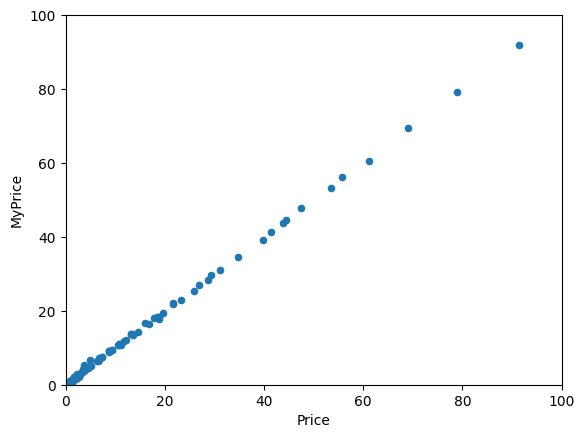

In [ ]:
df_holdings.plot(x='Price', y='MyPrice', kind='scatter', xlim=(0, 100), ylim=(0, 100));

In [ ]:
def crr_vanilla(cp, K, T, S0, vol, r, q, american=False, steps=1000):
    dt = T / steps                 # length of time-step
    u = np.exp(vol * np.sqrt(dt))  # up factor
    d = 1.0 / u                    # down factor
    a = np.exp((r-q)*dt)           # growth factor
    p = (a - d) / (u - d)          # risk-neutral up probability
    disc = np.exp(-r*dt)           # discount factor

    # initializing terminal underlying values
    S = S0 * (d**np.arange(steps, -1, -1)) * (u**np.arange(0, steps+1, 1))

    # value of option at final time step
    if cp == 'put':
        V = np.maximum(0, K - S)
    else:
        V = np.maximum(0, S - K)


    # backward recursion through the tree (only to the penultimate step so we can calculate delta)
    for i in np.arange(steps-1,0,-1): 
        S = (S * u)[0:-1] # a tricky way of calculating the previous underlying prices
        V =  disc * (p*V[1:i+2] + (1-p)*V[0:i+1])
        # check for early exercise
        if american:
            if cp == 'put':
                V = np.maximum(V, K - S)
            else:
                V = np.maximum(V, S - K)

    delta = (V[1] - V[0]) / (S[1] - S[0])
    price = disc * (p*V[1] + (1-p)*V[0])
    
    return price, delta

In [ ]:
def crr_px(row):
    underlying = row["Underlying"]
    if underlying == "Cash&Other":
        return(np.nan)
    
    cp = row["Type"].lower()
    if cp == "p":
        cp = "put"
    else:
        cp = "call"
    
    upx = row["UPX"]
    strike = row["StrikePrice"]
    t2x = row["D2X"] / 252
    rf = row["RF"]
    volatility = row["Volatility"]
    q = row["Div"]
    #px = black_scholes_merton(cp, upx, strike, t2x, rf, volatility, q)
    px = crr_vanilla(cp, strike, t2x, upx, volatility, rf, q, american=True, steps=5000)[0]
    px = np.round(px, 4)
    
    return(px)

In [ ]:
df_holdings["MyPriceAmerican"] = df_holdings.apply(crr_px, axis=1)
df_holdings

,Date,Account,Underlying,MaturityDate,StrikePrice,Type,Price,Shares,MarketValue,Weightings,SharesOutstanding,D2X,UPX,Moneyness,RF,Div,Volatility,MyPrice,MyPriceAmerican
0,2024-07-12,APRT,SPY,2025-03-31,3.87,C,553.2247,2129.00,1.177815e+08,100.65%,3175000,180.0,559.99,0.006911,0.049883,0.00596,0.2500,553.8766,556.1196
1,2024-07-12,APRT,SPY,2025-03-31,617.33,C,8.6830,-2129.00,-1.848611e+06,-1.58%,3175000,180.0,559.99,1.102395,0.049883,0.00596,0.1184,8.7971,8.7974
2,2024-07-12,APRT,SPY,2025-03-31,470.76,P,5.1659,-2129.00,-1.099820e+06,-0.94%,3175000,180.0,559.99,0.840658,0.049883,0.00596,0.2066,5.1887,5.3727
3,2024-07-12,APRT,SPY,2025-03-31,523.02,P,10.6462,2129.00,2.266576e+06,1.94%,3175000,180.0,559.99,0.933981,0.049883,0.00596,0.1690,10.8503,11.4883
4,2024-07-12,APRT,Cash&Other,NaN,NaN,NaN,1.0000,-91551.78,-9.155178e+04,-0.08%,3175000,NaN,559.99,NaN,NaN,NaN,0.2500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2024-07-12,SIXZ,SPY,2024-10-31,3.71,C,555.1102,150.00,8.326653e+06,105.44%,300000,78.0,559.99,0.006625,0.052484,0.00557,0.2500,555.3752,556.2798
170,2024-07-12,SIXZ,SPY,2024-10-31,543.69,C,31.0701,-150.00,-4.660515e+05,-5.90%,300000,78.0,559.99,0.970892,0.052484,0.00557,0.1348,31.1526,31.1523
171,2024-07-12,SIXZ,SPY,2024-10-31,451.78,P,1.0376,-150.00,-1.556400e+04,-0.20%,300000,78.0,559.99,0.806764,0.052484,0.00557,0.2461,1.3261,1.3439
172,2024-07-12,SIXZ,SPY,2024-10-31,501.93,P,2.6020,150.00,3.903000e+04,0.49%,300000,78.0,559.99,0.896320,0.052484,0.00557,0.1817,2.8194,2.8866


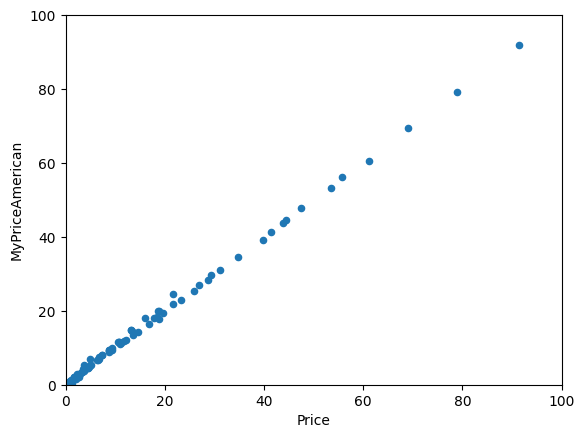

In [ ]:
df_holdings.plot(x='Price', y='MyPriceAmerican', kind='scatter', xlim=(0, 100), ylim=(0, 100));

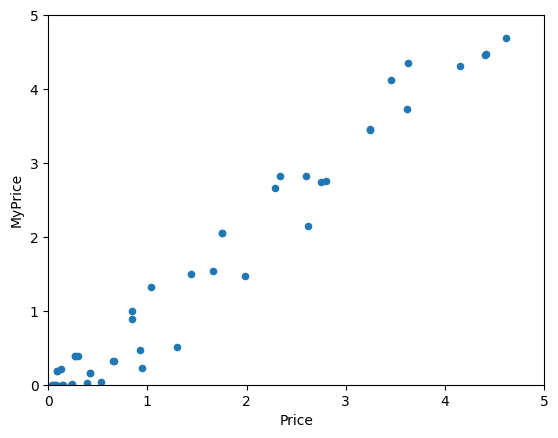

In [ ]:
df_holdings.query("MyPriceAmerican < 5").plot(x='Price', y='MyPrice', kind='scatter', xlim=(0, 5), ylim=(0, 5));

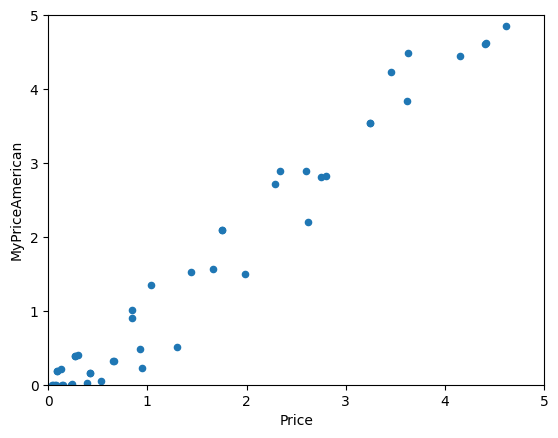

In [ ]:
df_holdings.query("MyPriceAmerican < 5").plot(x='Price', y='MyPriceAmerican', kind='scatter', xlim=(0, 5), ylim=(0, 5));

In [ ]:
df_holdings.query("MyPrice< 5")

,Date,Account,Underlying,MaturityDate,StrikePrice,Type,Price,Shares,MarketValue,Weightings,SharesOutstanding,D2X,UPX,Moneyness,RF,Div,Volatility,MyPrice,MyPriceAmerican
7,2024-07-12,APRW,SPY,2025-03-31,418.46,P,2.7481,-6089.0,-1673318.09,-0.51%,10479000,180.0,559.99,0.747263,0.049883,0.005960,0.2500,2.7487,2.8140
16,2024-07-12,AUGT,SPY,2024-07-31,412.01,P,0.0534,-506.0,-2702.04,-0.01%,925000,13.0,559.99,0.735745,0.053321,0.006620,0.2500,0.0000,0.0000
17,2024-07-12,AUGT,SPY,2024-07-31,457.74,P,0.0905,506.0,4579.30,0.02%,925000,13.0,559.99,0.817407,0.053321,0.006620,0.3970,0.1859,0.1861
21,2024-07-12,AUGW,SPY,2024-07-31,366.23,P,0.0348,-1339.0,-4659.72,-0.01%,2450000,13.0,559.99,0.653994,0.053321,0.006620,0.2500,0.0000,0.0000
22,2024-07-12,AUGW,SPY,2024-07-31,457.84,P,0.0906,1339.0,12131.34,0.02%,2450000,13.0,559.99,0.817586,0.053321,0.006620,0.3966,0.1858,0.1860
26,2024-07-12,DECT,SPY,2024-11-29,410.76,P,0.9286,-395.0,-36679.70,-0.18%,650000,98.0,559.99,0.733513,0.052082,0.005580,0.2500,0.4721,0.4781
27,2024-07-12,DECT,SPY,2024-11-29,456.35,P,1.7476,395.0,69030.20,0.34%,650000,98.0,559.99,0.814925,0.052082,0.005580,0.2351,2.0512,2.0873
31,2024-07-12,DECW,SPY,2024-11-29,365.12,P,0.5297,-1628.0,-86235.16,-0.11%,2700000,98.0,559.99,0.652012,0.052082,0.005580,0.2500,0.0433,0.0437
32,2024-07-12,DECW,SPY,2024-11-29,456.45,P,1.7503,1628.0,284948.84,0.35%,2700000,98.0,559.99,0.815104,0.052082,0.005580,0.2350,2.0545,2.0908
36,2024-07-12,FEBT,SPY,2025-01-31,434.59,P,2.2902,-764.0,-174971.28,-0.43%,1250000,140.0,559.99,0.776067,0.050956,0.004897,0.2500,2.6573,2.7129
